In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("carsdataset.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot:>

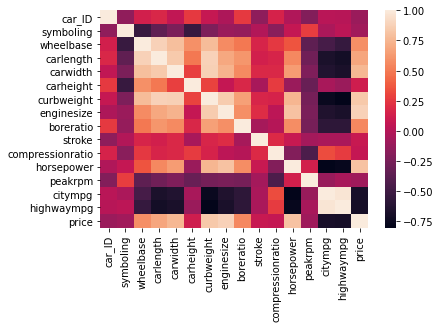

In [5]:
sns.heatmap(df.corr(), )

c:\Users\PRASANTA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


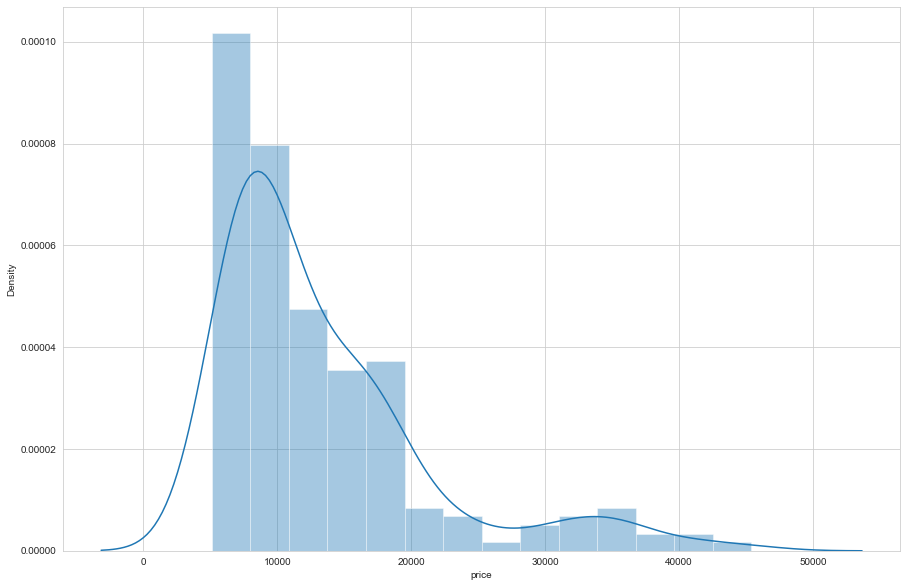

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

In [7]:


data = df[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
              "price"]]
x = np.array(data.drop(["price"], 1))
y = np.array(data["price"])

C:\Users\PRASANTA\AppData\Local\Temp/ipykernel_9312/1227592051.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop(["price"], 1))


In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)

from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(Xtrain, Ytrain)

predic = lrModel.predict(Xtest)

from sklearn.metrics import mean_absolute_error
lrACC = lrModel.score(Xtest,predic)
print(lrACC)

1.0


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
dtACC = model.score(xtest, predictions)
print(dtACC)

1.0


In [24]:
print(predictions)

[15985.  13950.  14869.   6649.   9895.  11199.  28176.   7198.   5572.
 16515.  30760.   9095.   6229.   8916.5 28176.  14869.  28176.  32528.
 45400.  16515.   8189.   6692.  13950.   8238.  17950.   7898.  18280.
 35550.  28176.  16630.   7995.   8189.  10245.   7099.   9980.  15510.
 13200.  17710.   7299.   7957.   6095. ]


Text(0.5, 1.0, 'Accuracy')

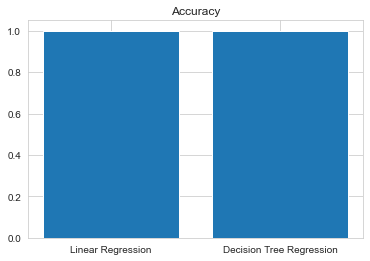

In [29]:
plt.bar(["Linear Regression","Decision Tree Regression"],height=[lrACC,dtACC])
plt.title("Accuracy")

Both the models are giving us same accuracy